In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import os
import sys
sys.path

['/home/ademin/signature-based-gb/f5/rbench-experiments/jupyter',
 '/usr/lib/python39.zip',
 '/usr/lib/python3.9',
 '/usr/lib/python3.9/lib-dynload',
 '',
 '/home/ademin/.local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.9/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/ademin/.ipython']

In [4]:
sys.path.append('/home/ademin/reduce-algebra-code/generic/rbench')

In [5]:
import rbench as rb

In [8]:
groebner = rb.read_filetree('../benchmark-results/groebner/2022-05-25', 'groebner').select('boot').deselect(['heapsize', 'valid'])

In [9]:
groebner

groebner                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000003 2022-05-25 04:28:41+02:00     0.01    0.00          NaN   
BIOMD0000000006 2022-05-25 04:28:42+02:00     0.00    0.00          NaN   
BIOMD0000000024 2022-05-25 04:28:43+02:00     0.01    0.00          NaN   
BIOMD0000000035 2022-05-25 04:28:39+02:00     0.01    0.01          NaN   
BIOMD0000000036 2022-05-25 04:28:40+02:00     0.01    0.00          NaN   
...                                   ...      ...     ...          ...   
BIOMD0000001021 2022-05-25 04:28:40+02:00     0.01    0.00          NaN   
BIOMD0000001031 2022-05-25 04:28:40+02:00     0.01    0.00          NaN   
BIOMD0000001034 2022-05-25 04:28:42+02:00     0.01    0.01          NaN   
BIOMD0000001035 2022-05-25 04:28:39+02:00     0.01    0.00          NaN   
BIOMD0000001038 2022-05-25 04:28:39+02:00     0.00    0.01          NaN   

                                           
                                 end_boot  
BIOMD0000000003 2022-05-25 04:28:41+02:00  
BIOMD0000000006 2022-05-25 04:28:42+02:00  
BIOMD0000000024 2022-05-25 04:28:43+02:00  
BIOMD0000000035 2022-05-25 04:28:39+02:00  
BIOMD0000000036 2022-05-25 04:28:40+02:00  
...                                   ...  
BIOMD0000001021 2022-05-25 04:28:40+02:00  
BIOMD0000001031 2022-05-25 04:28:41+02:00  
BIOMD0000001034 2022-05-25 04:28:42+02:00  
BIOMD0000001035 2022-05-25 04:28:40+02:00  
BIOMD0000001038 2022-05-25 04:28:40+02:00  

[133 rows x 5 columns]

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

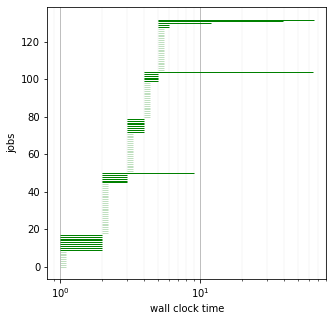

In [18]:
groebner.plot.schedule()

In [107]:
f5 = rb.read_filetree('../benchmark-results/f5/2022-05-25', 'f5').select('boot').deselect(['heapsize', 'valid'])

In [108]:
f5.info()

<class 'rbench.analytics.RbDataFrame'>
Index: 133 entries, BIOMD0000000003 to BIOMD0000001038
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype                                
---  ------              --------------  -----                                
 0   (f5, start_boot)    133 non-null    datetime64[ns, pytz.FixedOffset(120)]
 1   (f5, cpu_boot)      128 non-null    float64                              
 2   (f5, gc_boot)       128 non-null    float64                              
 3   (f5, sigxcpu_boot)  5 non-null      float64                              
 4   (f5, end_boot)      133 non-null    datetime64[ns, pytz.FixedOffset(120)]
dtypes: datetime64[ns, pytz.FixedOffset(120)](2), float64(3)
memory usage: 6.2+ KB


rbench.analytics.RbDataFrame

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

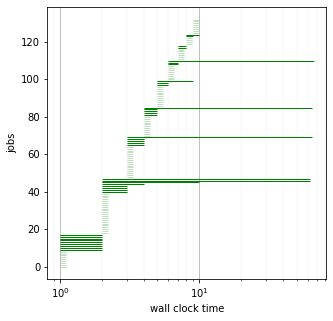

In [20]:
f5.plot.schedule()

In [21]:
combo = groebner.join(f5, how='inner')

In [39]:
combo

groebner                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000003 2022-05-25 04:28:41+02:00     0.01    0.00          NaN   
BIOMD0000000006 2022-05-25 04:28:42+02:00     0.00    0.00          NaN   
BIOMD0000000024 2022-05-25 04:28:43+02:00     0.01    0.00          NaN   
BIOMD0000000035 2022-05-25 04:28:39+02:00     0.01    0.01          NaN   
BIOMD0000000036 2022-05-25 04:28:40+02:00     0.01    0.00          NaN   
...                                   ...      ...     ...          ...   
BIOMD0000001021 2022-05-25 04:28:40+02:00     0.01    0.00          NaN   
BIOMD0000001031 2022-05-25 04:28:40+02:00     0.01    0.00          NaN   
BIOMD0000001034 2022-05-25 04:28:42+02:00     0.01    0.01          NaN   
BIOMD0000001035 2022-05-25 04:28:39+02:00     0.01    0.00          NaN   
BIOMD0000001038 2022-05-25 04:28:39+02:00     0.00    0.01          NaN   

                                                                 f5           \
                                 end_boot                start_boot cpu_boot   
BIOMD0000000003 2022-05-25 04:28:41+02:00 2022-05-25 04:30:07+02:00     0.02   
BIOMD0000000006 2022-05-25 04:28:42+02:00 2022-05-25 04:30:05+02:00     0.01   
BIOMD0000000024 2022-05-25 04:28:43+02:00 2022-05-25 04:30:04+02:00     0.01   
BIOMD0000000035 2022-05-25 04:28:39+02:00 2022-05-25 04:30:10+02:00     0.01   
BIOMD0000000036 2022-05-25 04:28:40+02:00 2022-05-25 04:30:07+02:00     0.01   
...                                   ...                       ...      ...   
BIOMD0000001021 2022-05-25 04:28:40+02:00 2022-05-25 04:30:10+02:00     0.02   
BIOMD0000001031 2022-05-25 04:28:41+02:00 2022-05-25 04:30:08+02:00     0.01   
BIOMD0000001034 2022-05-25 04:28:42+02:00 2022-05-25 04:30:05+02:00     0.00   
BIOMD0000001035 2022-05-25 04:28:40+02:00 2022-05-25 04:30:08+02:00     0.01   
BIOMD0000001038 2022-05-25 04:28:40+02:00 2022-05-25 04:30:11+02:00     0.01   

                                                                
                gc_boot sigxcpu_boot                  end_boot  
BIOMD0000000003    0.00          NaN 2022-05-25 04:30:07+02:00  
BIOMD0000000006    0.00          NaN 2022-05-25 04:30:05+02:00  
BIOMD0000000024    0.01          NaN 2022-05-25 04:30:04+02:00  
BIOMD0000000035    0.01          NaN 2022-05-25 04:30:10+02:00  
BIOMD0000000036    0.01          NaN 2022-05-25 04:30:07+02:00  
...                 ...          ...                       ...  
BIOMD0000001021    0.00          NaN 2022-05-25 04:30:11+02:00  
BIOMD0000001031    0.01          NaN 2022-05-25 04:30:08+02:00  
BIOMD0000001034    0.02          NaN 2022-05-25 04:30:05+02:00  
BIOMD0000001035    0.01          NaN 2022-05-25 04:30:08+02:00  
BIOMD0000001038    0.00          NaN 2022-05-25 04:30:11+02:00  

[133 rows x 10 columns]

In [40]:
combo.slow(0.5)

groebner                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000038 2022-05-25 04:28:40+02:00     0.51    0.00          NaN   
BIOMD0000000046 2022-05-25 04:28:41+02:00     1.20    0.00          NaN   
BIOMD0000000102 2022-05-25 04:28:43+02:00     5.99    0.00          NaN   
BIOMD0000000108 2022-05-25 04:28:43+02:00    32.07    0.01          NaN   
BIOMD0000000166 2022-05-25 04:28:43+02:00     0.12    0.01          NaN   
BIOMD0000000759 2022-05-25 04:28:40+02:00     6.51    0.00          NaN   
BIOMD0000000769 2022-05-25 04:28:41+02:00     0.80    0.00          NaN   

                                                                 f5           \
                                 end_boot                start_boot cpu_boot   
BIOMD0000000038 2022-05-25 04:28:40+02:00 2022-05-25 04:30:10+02:00     2.18   
BIOMD0000000046 2022-05-25 04:28:42+02:00 2022-05-25 04:30:07+02:00     3.45   
BIOMD0000000102 2022-05-25 04:28:50+02:00 2022-05-25 04:30:04+02:00      NaN   
BIOMD0000000108 2022-05-25 04:29:17+02:00 2022-05-25 04:30:04+02:00     7.80   
BIOMD0000000166 2022-05-25 04:28:43+02:00 2022-05-25 04:30:04+02:00     2.01   
BIOMD0000000759 2022-05-25 04:28:47+02:00 2022-05-25 04:30:06+02:00      NaN   
BIOMD0000000769 2022-05-25 04:28:42+02:00 2022-05-25 04:30:06+02:00     0.50   

                                                                
                gc_boot sigxcpu_boot                  end_boot  
BIOMD0000000038    0.00          NaN 2022-05-25 04:30:12+02:00  
BIOMD0000000046    0.00          NaN 2022-05-25 04:30:11+02:00  
BIOMD0000000102     NaN         0.06 2022-05-25 04:31:04+02:00  
BIOMD0000000108    0.01          NaN 2022-05-25 04:30:12+02:00  
BIOMD0000000166    0.02          NaN 2022-05-25 04:30:06+02:00  
BIOMD0000000759     NaN         0.06 2022-05-25 04:31:06+02:00  
BIOMD0000000769    0.01          NaN 2022-05-25 04:30:06+02:00

<AxesSubplot:xlabel='(groebner, cpu_boot)', ylabel='(f5, cpu_boot)'>

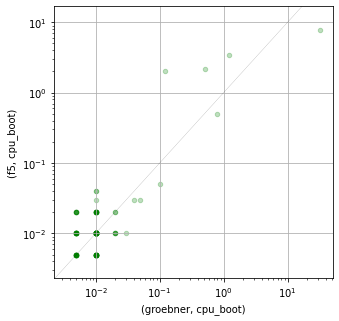

In [23]:
combo.plot.scatter(x=('groebner', 'cpu_boot'), y=('f5', 'cpu_boot'), color='g')

In [33]:
combo.describe()

groebner                                   f5              \
         cpu_boot     gc_boot sigxcpu_boot    cpu_boot     gc_boot   
count  131.000000  131.000000         2.00  128.000000  128.000000   
mean     0.369313    0.003435         0.06    0.134375    0.008281   
std      2.897293    0.004767         0.00    0.791175    0.006288   
min      0.000000    0.000000         0.06    0.000000    0.000000   
25%      0.000000    0.000000         0.06    0.000000    0.000000   
50%      0.010000    0.000000         0.06    0.010000    0.010000   
75%      0.010000    0.010000         0.06    0.012500    0.010000   
max     32.070000    0.010000         0.06    7.800000    0.020000   

                    
      sigxcpu_boot  
count         5.00  
mean          0.06  
std           0.00  
min           0.06  
25%           0.06  
50%           0.06  
75%           0.06  
max           0.06

In [36]:
combo_nonan = combo[[('f5', 'cpu_boot'), ('groebner', 'cpu_boot')]].dropna()

In [37]:
combo_nonan

,f5,groebner
,cpu_boot,cpu_boot
BIOMD0000000003,0.02,0.01
BIOMD0000000006,0.01,0.00
BIOMD0000000024,0.01,0.01
BIOMD0000000035,0.01,0.01
BIOMD0000000036,0.01,0.01
...,...,...
BIOMD0000001021,0.02,0.01
BIOMD0000001031,0.01,0.01
BIOMD0000001034,0.00,0.01


In [38]:
combo_nonan.describe()

,f5,groebner
,cpu_boot,cpu_boot
count,128.000000,128.000000
mean,0.134375,0.279922
std,0.791175,2.835149
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.010000,0.010000
75%,0.012500,0.010000
max,7.800000,32.070000


In [42]:
combo[('groebner', 'cpu_boot')].median(), combo[('f5', 'cpu_boot')].median()

(0.01, 0.01)

In [47]:
sortf5 = rb.read_filetree('../benchmark-results/f5/sort2022-05-25', 'sortf5').select('boot').deselect(['heapsize', 'valid'])

In [103]:
sortf5

sortf5                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000003 2022-05-25 05:48:54+02:00     0.01    0.01          NaN   
BIOMD0000000006 2022-05-25 05:48:52+02:00     0.02    0.00          NaN   
BIOMD0000000024 2022-05-25 05:48:51+02:00     0.00    0.02          NaN   
BIOMD0000000035 2022-05-25 05:48:56+02:00     0.02    0.01          NaN   
BIOMD0000000036 2022-05-25 05:48:53+02:00     0.01    0.01          NaN   
...                                   ...      ...     ...          ...   
BIOMD0000001021 2022-05-25 05:48:56+02:00     0.01    0.01          NaN   
BIOMD0000001031 2022-05-25 05:48:54+02:00     0.00    0.01          NaN   
BIOMD0000001034 2022-05-25 05:48:52+02:00     0.02    0.00          NaN   
BIOMD0000001035 2022-05-25 05:48:55+02:00     0.01    0.01          NaN   
BIOMD0000001038 2022-05-25 05:48:57+02:00     0.00    0.02          NaN   

                                           
                                 end_boot  
BIOMD0000000003 2022-05-25 05:48:54+02:00  
BIOMD0000000006 2022-05-25 05:48:52+02:00  
BIOMD0000000024 2022-05-25 05:48:51+02:00  
BIOMD0000000035 2022-05-25 05:48:56+02:00  
BIOMD0000000036 2022-05-25 05:48:54+02:00  
...                                   ...  
BIOMD0000001021 2022-05-25 05:48:56+02:00  
BIOMD0000001031 2022-05-25 05:48:54+02:00  
BIOMD0000001034 2022-05-25 05:48:52+02:00  
BIOMD0000001035 2022-05-25 05:48:55+02:00  
BIOMD0000001038 2022-05-25 05:48:57+02:00  

[133 rows x 5 columns]

In [48]:
f5

f5                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000003 2022-05-25 04:30:07+02:00     0.02    0.00          NaN   
BIOMD0000000006 2022-05-25 04:30:05+02:00     0.01    0.00          NaN   
BIOMD0000000024 2022-05-25 04:30:04+02:00     0.01    0.01          NaN   
BIOMD0000000035 2022-05-25 04:30:10+02:00     0.01    0.01          NaN   
BIOMD0000000036 2022-05-25 04:30:07+02:00     0.01    0.01          NaN   
...                                   ...      ...     ...          ...   
BIOMD0000001021 2022-05-25 04:30:10+02:00     0.02    0.00          NaN   
BIOMD0000001031 2022-05-25 04:30:08+02:00     0.01    0.01          NaN   
BIOMD0000001034 2022-05-25 04:30:05+02:00     0.00    0.02          NaN   
BIOMD0000001035 2022-05-25 04:30:08+02:00     0.01    0.01          NaN   
BIOMD0000001038 2022-05-25 04:30:11+02:00     0.01    0.00          NaN   

                                           
                                 end_boot  
BIOMD0000000003 2022-05-25 04:30:07+02:00  
BIOMD0000000006 2022-05-25 04:30:05+02:00  
BIOMD0000000024 2022-05-25 04:30:04+02:00  
BIOMD0000000035 2022-05-25 04:30:10+02:00  
BIOMD0000000036 2022-05-25 04:30:07+02:00  
...                                   ...  
BIOMD0000001021 2022-05-25 04:30:11+02:00  
BIOMD0000001031 2022-05-25 04:30:08+02:00  
BIOMD0000001034 2022-05-25 04:30:05+02:00  
BIOMD0000001035 2022-05-25 04:30:08+02:00  
BIOMD0000001038 2022-05-25 04:30:11+02:00  

[133 rows x 5 columns]

In [49]:
sortf5

sortf5                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000003 2022-05-25 05:48:54+02:00     0.01    0.01          NaN   
BIOMD0000000006 2022-05-25 05:48:52+02:00     0.02    0.00          NaN   
BIOMD0000000024 2022-05-25 05:48:51+02:00     0.00    0.02          NaN   
BIOMD0000000035 2022-05-25 05:48:56+02:00     0.02    0.01          NaN   
BIOMD0000000036 2022-05-25 05:48:53+02:00     0.01    0.01          NaN   
...                                   ...      ...     ...          ...   
BIOMD0000001021 2022-05-25 05:48:56+02:00     0.01    0.01          NaN   
BIOMD0000001031 2022-05-25 05:48:54+02:00     0.00    0.01          NaN   
BIOMD0000001034 2022-05-25 05:48:52+02:00     0.02    0.00          NaN   
BIOMD0000001035 2022-05-25 05:48:55+02:00     0.01    0.01          NaN   
BIOMD0000001038 2022-05-25 05:48:57+02:00     0.00    0.02          NaN   

                                           
                                 end_boot  
BIOMD0000000003 2022-05-25 05:48:54+02:00  
BIOMD0000000006 2022-05-25 05:48:52+02:00  
BIOMD0000000024 2022-05-25 05:48:51+02:00  
BIOMD0000000035 2022-05-25 05:48:56+02:00  
BIOMD0000000036 2022-05-25 05:48:54+02:00  
...                                   ...  
BIOMD0000001021 2022-05-25 05:48:56+02:00  
BIOMD0000001031 2022-05-25 05:48:54+02:00  
BIOMD0000001034 2022-05-25 05:48:52+02:00  
BIOMD0000001035 2022-05-25 05:48:55+02:00  
BIOMD0000001038 2022-05-25 05:48:57+02:00  

[133 rows x 5 columns]

In [90]:
combo2 = f5.join(sortf5, how='inner').slow(0.02)

In [91]:
combo2

f5                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000003 2022-05-25 04:30:07+02:00     0.02    0.00          NaN   
BIOMD0000000006 2022-05-25 04:30:05+02:00     0.01    0.00          NaN   
BIOMD0000000035 2022-05-25 04:30:10+02:00     0.01    0.01          NaN   
BIOMD0000000038 2022-05-25 04:30:10+02:00     2.18    0.00          NaN   
BIOMD0000000046 2022-05-25 04:30:07+02:00     3.45    0.00          NaN   
BIOMD0000000054 2022-05-25 04:30:03+02:00     0.01    0.01          NaN   
BIOMD0000000060 2022-05-25 04:30:06+02:00     0.02    0.00          NaN   
BIOMD0000000080 2022-05-25 04:30:11+02:00     0.02    0.01          NaN   
BIOMD0000000091 2022-05-25 04:30:03+02:00     0.01    0.00          NaN   
BIOMD0000000099 2022-05-25 04:30:10+02:00     0.00    0.01          NaN   
BIOMD0000000108 2022-05-25 04:30:04+02:00     7.80    0.01          NaN   
BIOMD0000000157 2022-05-25 04:30:06+02:00     0.01    0.00          NaN   
BIOMD0000000166 2022-05-25 04:30:04+02:00     2.01    0.02          NaN   
BIOMD0000000229 2022-05-25 04:30:05+02:00     0.02    0.00          NaN   
BIOMD0000000271 2022-05-25 04:30:03+02:00     0.02    0.00          NaN   
BIOMD0000000282 2022-05-25 04:30:05+02:00     0.02    0.01          NaN   
BIOMD0000000319 2022-05-25 04:30:08+02:00     0.04    0.00          NaN   
BIOMD0000000323 2022-05-25 04:30:04+02:00     0.02    0.00          NaN   
BIOMD0000000329 2022-05-25 04:30:04+02:00     0.00    0.02          NaN   
BIOMD0000000341 2022-05-25 04:30:09+02:00     0.00    0.01          NaN   
BIOMD0000000357 2022-05-25 04:30:03+02:00     0.01    0.01          NaN   
BIOMD0000000359 2022-05-25 04:30:05+02:00     0.02    0.01          NaN   
BIOMD0000000360 2022-05-25 04:30:08+02:00     0.02    0.00          NaN   
BIOMD0000000361 2022-05-25 04:30:05+02:00     0.02    0.00          NaN   
BIOMD0000000459 2022-05-25 04:30:09+02:00     0.02    0.00          NaN   
BIOMD0000000483 2022-05-25 04:30:04+02:00     0.02    0.00          NaN   
BIOMD0000000661 2022-05-25 04:30:07+02:00     0.04    0.00          NaN   
BIOMD0000000680 2022-05-25 04:30:05+02:00     0.01    0.01          NaN   
BIOMD0000000708 2022-05-25 04:30:07+02:00     0.02    0.00          NaN   
BIOMD0000000710 2022-05-25 04:30:03+02:00     0.01    0.01          NaN   
BIOMD0000000716 2022-05-25 04:30:06+02:00     0.02    0.00          NaN   
BIOMD0000000745 2022-05-25 04:30:05+02:00     0.05    0.01          NaN   
BIOMD0000000755 2022-05-25 04:30:03+02:00     0.02    0.00          NaN   
BIOMD0000000759 2022-05-25 04:30:06+02:00      NaN     NaN         0.06   
BIOMD0000000769 2022-05-25 04:30:06+02:00     0.50    0.01          NaN   
BIOMD0000000770 2022-05-25 04:30:05+02:00     0.03    0.01          NaN   
BIOMD0000000780 2022-05-25 04:30:04+02:00     0.02    0.00          NaN   
BIOMD0000000870 2022-05-25 04:30:08+02:00     0.03    0.00          NaN   
BIOMD0000000871 2022-05-25 04:30:03+02:00     0.02    0.01          NaN   
BIOMD0000000874 2022-05-25 04:30:09+02:00     0.02    0.00          NaN   
BIOMD0000000882 2022-05-25 04:30:05+02:00     0.02    0.00          NaN   
BIOMD0000000886 2022-05-25 04:30:04+02:00     0.03    0.01          NaN   
BIOMD0000000894 2022-05-25 04:30:08+02:00     0.02    0.00          NaN   
BIOMD0000000905 2022-05-25 04:30:05+02:00     0.01    0.01          NaN   
BIOMD0000000987 2022-05-25 04:30:07+02:00     0.01    0.01          NaN   
BIOMD0000001021 2022-05-25 04:30:10+02:00     0.02    0.00          NaN   
BIOMD0000001034 2022-05-25 04:30:05+02:00     0.00    0.02          NaN   

                                                             sortf5           \
                                 end_boot                start_boot cpu_boot   
BIOMD0000000003 2022-05-25 04:30:07+02:00 2022-05-25 05:48:54+02:00     0.01   
BIOMD0000000006 2022-05-25 04:30:05+02:00 2022-05-25 05:48:52+02:00     0.02   
BIOMD0000000035 2022-05-25 04:30:10+02:00 2

<AxesSubplot:xlabel='(f5, cpu_boot)', ylabel='(sortf5, cpu_boot)'>

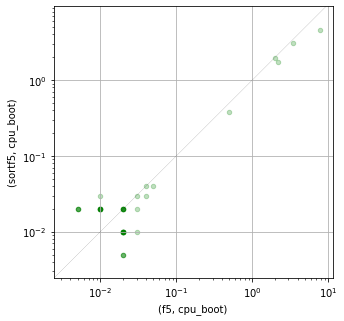

In [92]:
combo2.plot.scatter(x=('f5', 'cpu_boot'), y=('sortf5', 'cpu_boot'), color='g')

In [93]:
combo2[combo2[('f5', 'cpu_boot')] > combo2[('sortf5', 'cpu_boot')]].sort_values(by=('sortf5', 'cpu_boot')).count()

f5      start_boot      23
        cpu_boot        23
        gc_boot         23
        sigxcpu_boot     0
        end_boot        23
sortf5  start_boot      23
        cpu_boot        23
        gc_boot         23
        sigxcpu_boot     0
        end_boot        23
dtype: int64

In [94]:
combo2[combo2[('f5', 'cpu_boot')] == combo2[('sortf5', 'cpu_boot')]].sort_values(by=('sortf5', 'cpu_boot')).count()

f5      start_boot      9
        cpu_boot        9
        gc_boot         9
        sigxcpu_boot    0
        end_boot        9
sortf5  start_boot      9
        cpu_boot        9
        gc_boot         9
        sigxcpu_boot    0
        end_boot        9
dtype: int64

In [95]:
combo2[combo2[('f5', 'cpu_boot')] < combo2[('sortf5', 'cpu_boot')]].sort_values(by=('sortf5', 'cpu_boot')).count()

f5      start_boot      14
        cpu_boot        14
        gc_boot         14
        sigxcpu_boot     0
        end_boot        14
sortf5  start_boot      14
        cpu_boot        14
        gc_boot         14
        sigxcpu_boot     0
        end_boot        14
dtype: int64

In [58]:
combo2_nonan = combo2[[('f5', 'cpu_boot'), ('sortf5', 'cpu_boot')]].dropna()

In [59]:
combo2_nonan.describe()

,f5,sortf5
,cpu_boot,cpu_boot
count,128.000000,128.000000
mean,0.134375,0.101562
std,0.791175,0.536751
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.010000,0.010000
75%,0.012500,0.010000
max,7.800000,4.600000


<AxesSubplot:xlabel='(f5, cpu_boot)', ylabel='(sortf5, cpu_boot)'>

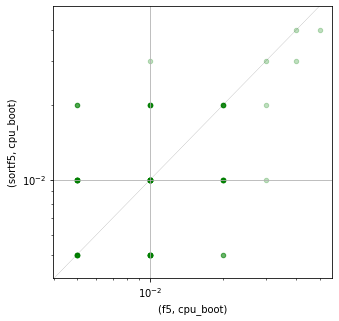

In [63]:
combo2.fast(0.10).plot.scatter(x=('f5', 'cpu_boot'), y=('sortf5', 'cpu_boot'), color='g')

<AxesSubplot:xlabel='(f5, cpu_boot)', ylabel='(groebner, cpu_boot)'>

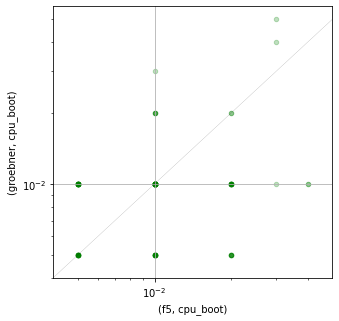

In [64]:
combo.fast(0.1).plot.scatter(x=('f5', 'cpu_boot'), y=('groebner', 'cpu_boot'), color='g')

In [65]:
bigf5 = rb.read_filetree('../benchmark-results/f5/big2022-05-25', 'bigf5').select('boot').deselect(['heapsize', 'valid'])

In [66]:
biggroebner = rb.read_filetree('../benchmark-results/groebner/big2022-05-25', 'biggroebner').select('boot').deselect(['heapsize', 'valid'])

In [69]:
combo3 = bigf5.join(biggroebner, how='inner')

In [70]:
combo3

bigf5                                \
                               start_boot cpu_boot gc_boot sigxcpu_boot   
BIOMD0000000002 2022-05-25 06:17:06+02:00     0.15    0.01          NaN   
BIOMD0000000003 2022-05-25 06:17:20+02:00     0.00    0.01          NaN   
BIOMD0000000006 2022-05-25 06:17:09+02:00     0.01    0.01          NaN   
BIOMD0000000024 2022-05-25 06:17:07+02:00     0.01    0.01          NaN   
BIOMD0000000026 2022-05-25 06:17:47+02:00     0.01    0.02          NaN   
...                                   ...      ...     ...          ...   
BIOMD0000001021 2022-05-25 06:18:40+02:00     0.02    0.00          NaN   
BIOMD0000001031 2022-05-25 06:17:22+02:00     0.01    0.01          NaN   
BIOMD0000001034 2022-05-25 06:17:10+02:00     0.00    0.02          NaN   
BIOMD0000001035 2022-05-25 06:17:46+02:00     0.02    0.00          NaN   
BIOMD0000001038 2022-05-25 06:18:43+02:00     0.01    0.01          NaN   

                                                        biggroebner           \
                                 end_boot                start_boot cpu_boot   
BIOMD0000000002 2022-05-25 06:17:06+02:00 2022-05-25 06:33:31+02:00     1.27   
BIOMD0000000003 2022-05-25 06:17:20+02:00 2022-05-25 06:33:29+02:00     0.01   
BIOMD0000000006 2022-05-25 06:17:10+02:00 2022-05-25 06:33:31+02:00     0.01   
BIOMD0000000024 2022-05-25 06:17:07+02:00 2022-05-25 06:33:33+02:00     0.00   
BIOMD0000000026 2022-05-25 06:17:47+02:00 2022-05-25 06:33:27+02:00     0.02   
...                                   ...                       ...      ...   
BIOMD0000001021 2022-05-25 06:18:41+02:00 2022-05-25 06:33:27+02:00     0.01   
BIOMD0000001031 2022-05-25 06:17:22+02:00 2022-05-25 06:33:28+02:00     0.00   
BIOMD0000001034 2022-05-25 06:17:10+02:00 2022-05-25 06:33:30+02:00     0.01   
BIOMD0000001035 2022-05-25 06:17:46+02:00 2022-05-25 06:33:27+02:00     0.01   
BIOMD0000001038 2022-05-25 06:18:43+02:00 2022-05-25 06:33:27+02:00     0.00   

                                                                
                gc_boot sigxcpu_boot                  end_boot  
BIOMD0000000002    0.00          NaN 2022-05-25 06:33:32+02:00  
BIOMD0000000003    0.00          NaN 2022-05-25 06:33:29+02:00  
BIOMD0000000006    0.00          NaN 2022-05-25 06:33:31+02:00  
BIOMD0000000024    0.01          NaN 2022-05-25 06:33:33+02:00  
BIOMD0000000026    0.01          NaN 2022-05-25 06:33:27+02:00  
...                 ...          ...                       ...  
BIOMD0000001021    0.00          NaN 2022-05-25 06:33:28+02:00  
BIOMD0000001031    0.01          NaN 2022-05-25 06:33:29+02:00  
BIOMD0000001034    0.00          NaN 2022-05-25 06:33:31+02:00  
BIOMD0000001035    0.01          NaN 2022-05-25 06:33:27+02:00  
BIOMD0000001038    0.00          NaN 2022-05-25 06:33:27+02:00  

[166 rows x 10 columns]

In [71]:
combo3.describe()

bigf5                           biggroebner              \
         cpu_boot     gc_boot  sigxcpu_boot    cpu_boot     gc_boot   
count  158.000000  158.000000  8.000000e+00  160.000000  160.000000   
mean     0.885127    0.008734  6.000000e-01    0.426063    0.003813   
std      7.743620    0.006358  1.186878e-16    2.835099    0.004872   
min      0.000000    0.000000  6.000000e-01    0.000000    0.000000   
25%      0.010000    0.000000  6.000000e-01    0.000000    0.000000   
50%      0.010000    0.010000  6.000000e-01    0.010000    0.000000   
75%      0.020000    0.010000  6.000000e-01    0.010000    0.010000   
max     91.820000    0.020000  6.000000e-01   31.710000    0.010000   

                    
      sigxcpu_boot  
count          6.0  
mean           0.6  
std            0.0  
min            0.6  
25%            0.6  
50%            0.6  
75%            0.6  
max            0.6

In [74]:
combo3_nonan = combo3[[('bigf5', 'cpu_boot'), ('biggroebner', 'cpu_boot')]].dropna()

In [75]:
combo3_nonan.describe()

,bigf5,biggroebner
,cpu_boot,cpu_boot
count,157.000000,157.000000
mean,0.305924,0.386242
std,2.646324,2.825895
min,0.000000,0.000000
25%,0.010000,0.000000
50%,0.010000,0.010000
75%,0.020000,0.010000
max,32.680000,31.710000


<AxesSubplot:xlabel='(bigf5, cpu_boot)', ylabel='(biggroebner, cpu_boot)'>

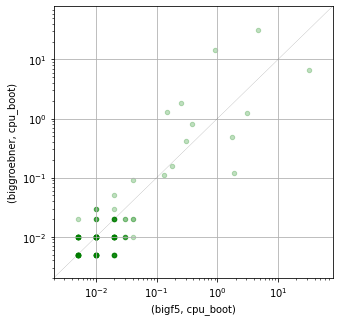

In [72]:
combo3.plot.scatter(x=('bigf5', 'cpu_boot'), y=('biggroebner', 'cpu_boot'), color='g')